In [3]:
import mdtraj as md
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq

https://figshare.com/articles/dataset/Microsecond_molecular_dynamics_simulation_of_kinase_domain_of_the_human_tyrosine_kinase_ABL1/4496795/1

This is a one microsecond trajectory of the catalytic domain of the human tyrosine protein kinase ABL1 (UNIPROT:ABL1_HUMAN, residues 242-493). The simulation was generated on Folding@home using OpenMM 6.3.1 with the AMBER99SB-ILDN forcefield, TIP3P water, and neutralizing salt. A Langevin integrator with 2 fs timestep, 300 K temperature, and 1/ps collision rate was used. PME with a nonbonded cutoff of 1.0 nm was used with default tolerance of 5.0e-4. A long-range isotropic dispersion correction was used to correct for the truncation of Lennard-Jones interactions at 1.0 nm. A molecular-scaling Monte Carlo barostat was applied using a 1 atm reference pressure, with MC moves attempted every 50 steps. Coordinates were saved every 250ps, and waters and ions stripped. The trajectory file contains 4000 snapshots. Initial models were generated with Ensembler (see References) using the ABL1 structure from chain B of PDB ID: 2GQG as a template.

https://www.rcsb.org/structure/2GQG

Trajetories and pdb can be downloaded here:
https://www.dropbox.com/s/qymy39ak2apqd75/ABL1.zip?dl=0


In [4]:
pdb='/Users/hainn/tolu/git/CHEM101.6_S24/exercise2_data/ABL1.pdb'
trajectory='/Users/hainn/tolu/git/CHEM101.6_S24/exercise2_data/ABL1.dcd'
outdir='/Users/hainn/tolu/git/CHEM101.6_S24/exercise2_data/output'
if not os.path.exists('outdir'):
    os.makedirs('outdir')
    
print("outdir:",outdir)
print("pdb:",pdb)
print("trjaectory:",trajectory)

outdir: /Users/hainn/tolu/git/CHEM101.6_S24/exercise2_data/output
pdb: /Users/hainn/tolu/git/CHEM101.6_S24/exercise2_data/ABL1.pdb
trjaectory: /Users/hainn/tolu/git/CHEM101.6_S24/exercise2_data/ABL1.dcd


In [5]:
trj = md.load(trajectory, top=pdb,stride=1)
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames=trj.n_frames

In [9]:
nres=[]
for res in trj.topology.residues: nres.append(res.resSeq)
sequence=(' %s' % [residue for residue in trj.topology.residues])
resname=(' %s' % [residue.name for residue in trj.topology.residues])
resindex=(' %s' % [residue.index for residue in trj.topology.residues])
res_num=(' %s' % [residue.resSeq  for residue in trj.topology.residues])



#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue number: %s\n" % res_num)
print("residue index: %s\n" % resindex)


** SYSTEM INFO **

Number of atoms: 4062

Number of residues: 252

Number of frames: 4000

Starting frame: 0

Last frame: 4000

sequence:  [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER3

In [10]:
residue_num=[]
for res in top.residues: 
    residue_num.append(res.resSeq)
residue_id=np.asarray(residue_num)
residue_id

array([242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
       307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
       320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358,
       359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
       372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
       385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
       398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
       411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 42

In [11]:
#Use DSSP to calculate the secondary structure definition
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
dssp=md.compute_dssp(trj,simplified=True)
dssp

array([['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'H', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ...,
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C']], dtype='<U2')

In [12]:
frame=0
dssp

array([['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'H', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ...,
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C']], dtype='<U2')

In [13]:
print(dssp.shape)
print("Rows:",len(dssp))
print("Columns:",len(dssp[0]))

#Print out helix and beta residues for a given frame
frame=0
dssp_frame=np.column_stack((residue_id,dssp[frame]))
helix_res=np.where(dssp_frame[:,1]=='H')
beta_res=np.where(dssp_frame[:,1]=='E')
coil_res=np.where(dssp_frame[:,1]=='C')
print('helical residues:',dssp_frame[helix_res])
print('beta residues:',dssp_frame[beta_res])
print('coil residues:',dssp_frame[coil_res])

(4000, 252)
Rows: 4000
Columns: 252
helical residues: [['280' 'H']
 ['281' 'H']
 ['282' 'H']
 ['283' 'H']
 ['284' 'H']
 ['285' 'H']
 ['286' 'H']
 ['287' 'H']
 ['288' 'H']
 ['289' 'H']
 ['323' 'H']
 ['324' 'H']
 ['325' 'H']
 ['326' 'H']
 ['327' 'H']
 ['337' 'H']
 ['338' 'H']
 ['339' 'H']
 ['340' 'H']
 ['341' 'H']
 ['342' 'H']
 ['343' 'H']
 ['344' 'H']
 ['345' 'H']
 ['346' 'H']
 ['347' 'H']
 ['348' 'H']
 ['349' 'H']
 ['350' 'H']
 ['351' 'H']
 ['352' 'H']
 ['353' 'H']
 ['354' 'H']
 ['355' 'H']
 ['356' 'H']
 ['357' 'H']
 ['366' 'H']
 ['367' 'H']
 ['368' 'H']
 ['373' 'H']
 ['374' 'H']
 ['375' 'H']
 ['403' 'H']
 ['404' 'H']
 ['405' 'H']
 ['408' 'H']
 ['409' 'H']
 ['410' 'H']
 ['411' 'H']
 ['412' 'H']
 ['413' 'H']
 ['420' 'H']
 ['421' 'H']
 ['422' 'H']
 ['423' 'H']
 ['424' 'H']
 ['425' 'H']
 ['426' 'H']
 ['427' 'H']
 ['428' 'H']
 ['429' 'H']
 ['430' 'H']
 ['431' 'H']
 ['432' 'H']
 ['433' 'H']
 ['449' 'H']
 ['450' 'H']
 ['451' 'H']
 ['452' 'H']
 ['453' 'H']
 ['466' 'H']
 ['467' 'H']
 ['468' 'H

In [14]:
print(dssp.shape)
print("Rows:",len(dssp))
print("Columns:",len(dssp[0]))

#Print out helix and beta residues for a given frame
frame=0
dssp_frame=np.column_stack((residue_id,dssp[frame]))
helix_res=np.where(dssp_frame[:,1]=='H')
beta_res=np.where(dssp_frame[:,1]=='E')
coil_res=np.where(dssp_frame[:,1]=='C')
print('helical residues:',dssp_frame[helix_res])
print('coil residues:',dssp_frame[coil_res])
print('beta residues:',dssp_frame[beta_res])


(4000, 252)
Rows: 4000
Columns: 252
helical residues: [['280' 'H']
 ['281' 'H']
 ['282' 'H']
 ['283' 'H']
 ['284' 'H']
 ['285' 'H']
 ['286' 'H']
 ['287' 'H']
 ['288' 'H']
 ['289' 'H']
 ['323' 'H']
 ['324' 'H']
 ['325' 'H']
 ['326' 'H']
 ['327' 'H']
 ['337' 'H']
 ['338' 'H']
 ['339' 'H']
 ['340' 'H']
 ['341' 'H']
 ['342' 'H']
 ['343' 'H']
 ['344' 'H']
 ['345' 'H']
 ['346' 'H']
 ['347' 'H']
 ['348' 'H']
 ['349' 'H']
 ['350' 'H']
 ['351' 'H']
 ['352' 'H']
 ['353' 'H']
 ['354' 'H']
 ['355' 'H']
 ['356' 'H']
 ['357' 'H']
 ['366' 'H']
 ['367' 'H']
 ['368' 'H']
 ['373' 'H']
 ['374' 'H']
 ['375' 'H']
 ['403' 'H']
 ['404' 'H']
 ['405' 'H']
 ['408' 'H']
 ['409' 'H']
 ['410' 'H']
 ['411' 'H']
 ['412' 'H']
 ['413' 'H']
 ['420' 'H']
 ['421' 'H']
 ['422' 'H']
 ['423' 'H']
 ['424' 'H']
 ['425' 'H']
 ['426' 'H']
 ['427' 'H']
 ['428' 'H']
 ['429' 'H']
 ['430' 'H']
 ['431' 'H']
 ['432' 'H']
 ['433' 'H']
 ['449' 'H']
 ['450' 'H']
 ['451' 'H']
 ['452' 'H']
 ['453' 'H']
 ['466' 'H']
 ['467' 'H']
 ['468' 'H

(242.0, 400.0)

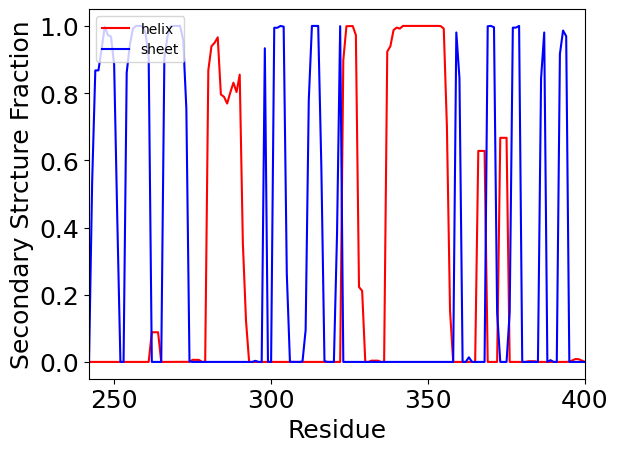

In [15]:
dssp=md.compute_dssp(trj,simplified=True)

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspH[dsspH=='H']=1                                                                                      
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=0                                                                                      
 dsspH[dsspH=='NA']=0 
 dsspH=dsspH.astype(int)
 TotalH=np.sum(dsspH,axis=1) 
 #sum down each colum and divide by the number of frames
 Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspE) 

 dsspE[dsspE=='H']=0
 dsspE[dsspE=='E']=1
 dsspE[dsspE=='C']=0
 dsspE[dsspE=='NA']=0
 dsspE=dsspE.astype(int)
 TotalE=np.sum(dsspE,axis=1) 
 Eprop=np.sum(dsspE,axis=0).astype(float)/len(dsspE) 
 return Hprop, Eprop

Hprop,Eprop=dssp_convert(dssp)
plt.plot(residue_num,Hprop,c='r',label='helix')
plt.plot(residue_num,Eprop,c='b',label='sheet')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(242,400)


***HOMEWORK Problem 1***

**Use the full DSSP set of secondary structure assignments to plot the population of another secondary structure type and visualize it with a representative frame or frames in VMD**

**Consult the original DSSP paper (or online documentaiton) to confirm the criteria for this assignment** 

Kabsch W, Sander C (1983). “Dictionary of protein secondary structure: pattern recognition of hydrogen-bonded and geometrical features”. Biopolymers 22 (12): 2577-637. doi:10.1002/bip.360221211

dssp=md.compute_dssp(trj,simplified=False)

https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

The DSSP assignment codes are:

‘H’ : Alpha helix

‘B’ : Residue in isolated beta-bridge

‘E’ : Extended strand, participates in beta ladder

‘G’ : 3-helix (3/10 helix)

‘I’ : 5 helix (pi helix)

‘T’ : hydrogen bonded turn

‘S’ : bend

‘ ‘ : Loops and irregular elements

The simplified DSSP codes are:

‘H’ : Helix. Either of the ‘H’, ‘G’, or ‘I’ codes.

‘E’ : Strand. Either of the ‘E’, or ‘B’ codes.

‘C’ : Coil. Either of the ‘T’, ‘S’ or ‘ ‘ codes.

In [16]:
####HOMEWORK ######
#Use the full DSSP Definition and plot the population of another secondary structure type 
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

dssp_full=md.compute_dssp(trj,simplified=False)


(242.0, 400.0)

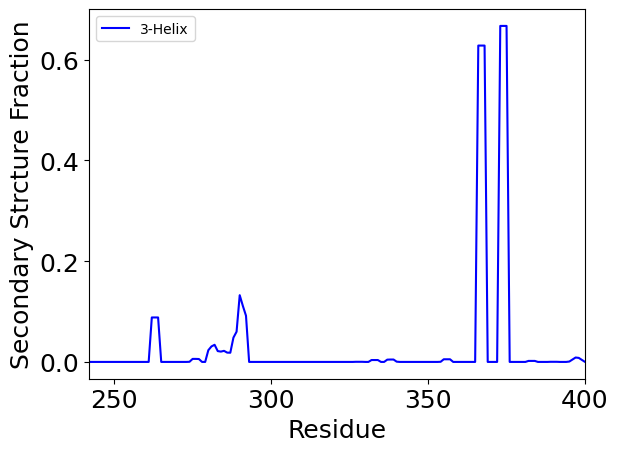

In [17]:
#find the population of 3-Helix
dsspG=np.copy(dssp_full)
dsspG[dsspG!='G']=0 
dsspG[dsspG=='G']=1                                                                                                                                                            
dsspG=dsspG.astype(int)
TotalG=np.sum(dsspG,axis=1) 
#sum down each column and divide by the number of frames
Gprop=np.sum(dsspG,axis=0).astype(float)/len(dsspG)

#plot the population of 3-Helix
plt.plot(residue_num,Gprop,c='b',label='3-Helix')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(242,400)

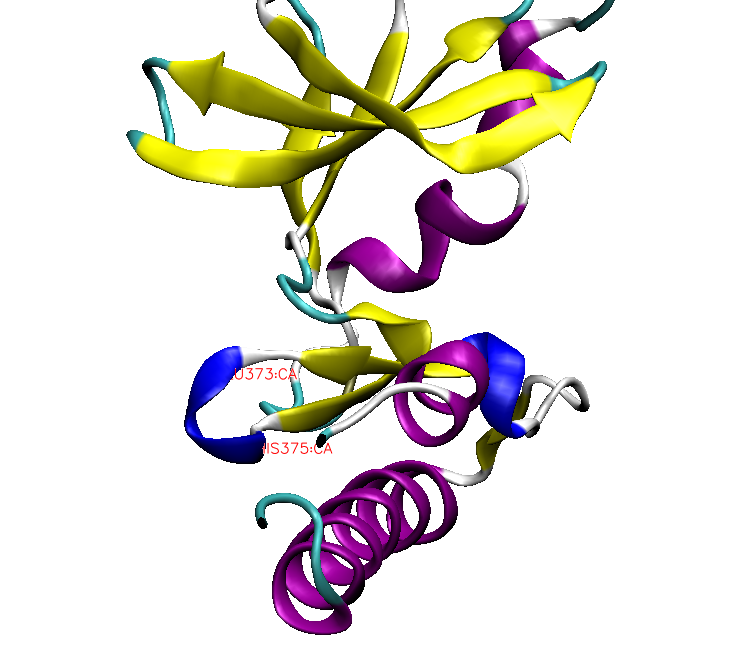

SS: H [281 282 283 324 325 326 327 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 410 411 422 423 424 425 426 427 428 429
 430 431 432 433 466 467 468 469 470 471 472 473 474 475 486 487 488 489]
SS: E [246 247 248 249 255 256 257 258 259 260 261 266 267 268 269 270 271 272
 301 302 303 304 313 314 315 369 370 371 377 378 379 392 393 394 415 416
 417]
SS: I []
SS: G []
SS: B [298]
SS: T [262 263 264 265 275 276 277 296 297 319 320 332 333 334 358 418 419 434
 435]
SS: S [307 308 309 310 390 391 414 436 439 440 478 479 483]
SS:   [242 274 279 293 294 299 300 311 317 318 331 336 361 363 364 380 381 382
 385 388 402 407 437 438 444 457 459 460 461 465 477 484 485 493]


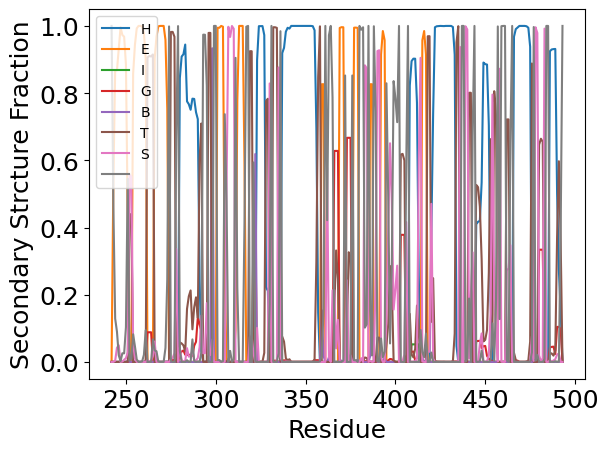

In [18]:
#Challenge Problem #1***

#Write function/efficient loop to calculate all secondary structure populations from the dssp_full definitions and write out all residues numbers with > 90% of each seondary structure type**#
#from the answer given in class

dssp_full=md.compute_dssp(trj,simplified=False)

def dssp_convert_type(dssp,type):
 dsspS=np.copy(dssp)
 dsspS[dsspS!=type]=0                                                                                      
 dsspS[dsspS==type]=1                                                                                      
 dsspS=dsspS.astype(int)
 TotalS=np.sum(dsspS,axis=1) 
 Sprop=np.sum(dsspS,axis=0).astype(float)/len(dsspS) 
 return Sprop

for t in ['H','E','I','G','B','T','S',' ']:
  Tprop=dssp_convert_type(dssp_full,t)
  plt.plot(residue_num,Tprop,label=t)
  print("SS:",t,np.asarray(residue_num)[np.where(Tprop>.90)])

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)





This is the real residue number: [280 284 285 286 287 288 289 290 323 356 366 367 368 373 374 375 408 412
 421 445 446 447 448 452 490]
This is the residue index in the data: [ 38  42  43  44  45  46  47  48  81 114 124 125 126 131 132 133 166 170
 179 203 204 205 206 210 248]
No frames with 'E' found.
First frame with 'C': 0


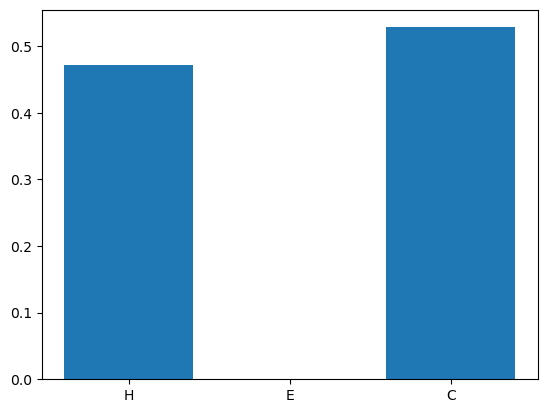

In [19]:
##***HOMEWORK Problem 2***

###Identify a residue that has a substantial population (>10%) of a second secondary structure assignment (for example something that is 50% helix/ 50% coil or 80% helix/ 20% coil) and make representative snapshots to illustrate the 2 conformations.  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation

# what residues have a Eprop that I care about? 
resid_index_S_half = np.where((Hprop > 0.4) & (Hprop < 0.9))[0]
print("This is the real residue number:", np.array(residue_num)[resid_index_S_half])
print("This is the residue index in the data:", resid_index_S_half)
# what are the frames where this is sheet? 
residue_445_dssp = dssp[:, 203]
frames_H = np.where(residue_445_dssp == "H")[0]
frames_E = np.where(residue_445_dssp == "E")[0]
frames_C = np.where(residue_445_dssp == "C")[0]

# Let's plot the fractions 
plt.bar(x=["H", "E", "C"], height=[len(frames_H) / 4000, len(frames_E) / 4000, len(frames_C) / 4000])

# print the first frames where this occurs:
if len(frames_E) > 0:
    print("First frame with 'E':", frames_E[0])
else:
    print("No frames with 'E' found.")
    
if len(frames_C) > 0:
    print("First frame with 'C':", frames_C[0])
else:
    print("No frames with 'C' found.")


This is the real residue number: [244 245 250 254 273 312 360 386]
This is the residue index in the data: [  2   3   8  12  31  70 118 144]
First frame with 'E': 81
First frame with 'C': 0


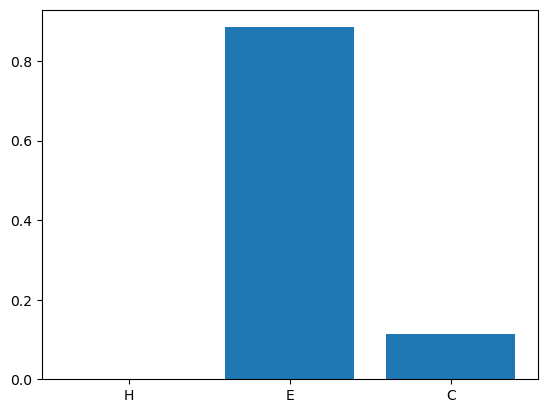

In [20]:
##***HOMEWORK Problem 2***

###Identify a residue that has a substantial population (>10%) of a second secondary structure assignment (for example something that is 50% helix/ 50% coil or 80% helix/ 20% coil) and make representative snapshots to illustrate the 2 conformations.  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation

# what residues have a Eprop that I care about? 
resid_index_S_half = np.where((Eprop > 0.7) & (Eprop < 0.9))[0]
print("This is the real residue number:", np.array(residue_num)[resid_index_S_half])
print("This is the residue index in the data:", resid_index_S_half)

# what are the frames where this is sheet? 
residue_250_dssp = dssp[:, 8]
frames_H = np.where(residue_250_dssp == "H")[0]
frames_E = np.where(residue_250_dssp == "E")[0]
frames_C = np.where(residue_250_dssp == "C")[0]

# Let's plot the fractions 
plt.bar(x=["H", "E", "C"], height=[len(frames_H) / 4000, len(frames_E) / 4000, len(frames_C) / 4000])

# print the first frames where this occurs:
print("First frame with 'E':", frames_E[0])
print("First frame with 'C':", frames_C[0])


This is the real residue number: [244 245 250 254]
This is the residue index in the data: [ 2  3  8 12]
First frame with 'E': 0
First frame with 'C': 8


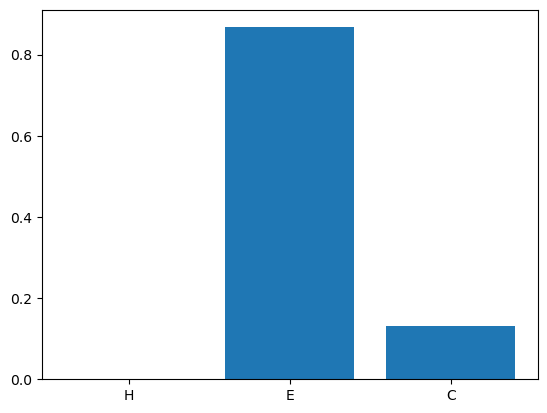

In [21]:
##***HOMEWORK Problem 2***

###Identify a residue that has a substantial population (>10%) of a second secondary structure assignment (for example something that is 50% helix/ 50% coil or 80% helix/ 20% coil) and make representative snapshots to illustrate the 2 conformations.  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation

# what residues have a Eprop that I care about? 
resid_index_S_half = np.where((Eprop > 0.85) & (Eprop < 0.9))[0]
print("This is the real residue number:", np.array(residue_num)[resid_index_S_half])
print("This is the residue index in the data:", resid_index_S_half)

# what are the frames where this is sheet? 
residue_244_dssp = dssp[:, 2]
frames_H = np.where(residue_244_dssp == "H")[0]
frames_E = np.where(residue_244_dssp == "E")[0]
frames_C = np.where(residue_244_dssp == "C")[0]

# Let's plot the fractions 
plt.bar(x=["H", "E", "C"], height=[len(frames_H) / 4000, len(frames_E) / 4000, len(frames_C) / 4000])

# print the first frames where this occurs:
print("First frame with 'E':", frames_E[0])
print("First frame with 'C':", frames_C[0])


In [ ]:

##***HOMEWORK Problem 2***

###Identify a residue that has a substantial population (>10%) of a second secondary structure assignment (for example something that is 50% helix/ 50% coil or 80% helix/ 20% coil) and make representative snapshots to illustrate the 2 conformations.  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation

dssp_full=md.compute_dssp(trj,simplified=False)

def dssp_convert_type(dssp,type):
 dsspS=np.copy(dssp)
 dsspS[dsspS!=type]=0                                                                                      
 dsspS[dsspS==type]=1                                                                                      
 dsspS=dsspS.astype(int)
 TotalS=np.sum(dsspS,axis=1) 
 Sprop=np.sum(dsspS,axis=0).astype(float)/len(dsspS) 
 return Sprop

for t in ['H','E','I','G','B','T','S',' ']:
  Tprop=dssp_convert_type(dssp_full,t)
  plt.plot(residue_num,Tprop,label=t)
  print("SS:",t,np.asarray(residue_num)[np.where(Tprop>.90)])
for t in ['H','E','I','G','B','T','S',' ']:
  Tprop=dssp_convert_type(dssp_full,t)
  plt.plot(residue_num,Tprop,label=t)
  print("SS:",t,np.asarray(residue_num)[np.where(Tprop>.90)])

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)

In [22]:
#Find all the frames where a given residue is H or E
residue_number=340
array_index=residue_number-242
print(np.asarray(residue_num)[array_index])
helix_frames=np.where(dssp[:,array_index]=='H')
beta_frames=np.where(dssp[:,array_index]=='E')

print("Residue %s"%np.asarray(residue_num)[array_index])
print("helix_frames:",helix_frames)
print("helix_frames:",beta_frames)

340
Residue 340
helix_frames: (array([   0,    1,    2, ..., 3997, 3998, 3999], dtype=int64),)
helix_frames: (array([], dtype=int64),)


In [23]:
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [24]:
np.shape(phis[:,0])

(4000,)

In [25]:
np.shape(indices_phi)

(251, 4)

In [26]:
phi_dict={}
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}

for i in range(0,len(indices_phi)):
  indices=indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]

In [27]:
sequence

' [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER349, ALA350, MET351, GLU352, TYR353, LEU354, GLU355, LYS356, LYS357, ASN358, PHE359, ILE360, HIS361, ARG362, ASP363, LEU364, ALA365, ALA36

In [28]:
#Heres a function to plot a phi/psi ramachandran plot:

def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
     plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()   
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return




In [55]:
#Find all the frames for a residue's phipsi and chi
residue_number=295
array_index=residue_number-242
print(np.asarray(residue_num)[array_index])
def get_phipsi_frames(res):
    phi_data = dihedral_dict['phi'][295]
    psi_data = dihedral_dict['psi'][295]
    return phi_data, psi_data

def get_chi_frames(res):
    chi1_data = None
    chi2_data = None
    if res in dihedral_dict['chi1']:
        chi1_data = dihedral_dict['chi1'][295]
    if res in dihedral_dict['chi2']:
        chi2_data = dihedral_dict['chi2'][295]
    return chi1_data, chi2_data


phi_frames, psi_frames = get_phipsi_frames(295)
chi1_frames, chi2_frames = get_chi_frames(295)

print("phipsi_frames:", phi_frames, psi_frames)
print("chi1chi2_frames:", chi1_frames, chi2_frames)


295
phipsi_frames: [-1.60299   -1.932152  -1.9020777 ... -0.8512847 -1.0720464 -1.3135767] [2.3337786 2.2439644 2.3854728 ... 2.1979377 2.2274637 1.8935648]
chi1chi2_frames: [-3.1365798  2.9930718  3.0005019 ... -3.0442889 -3.082708  -3.0829837] [1.4520367 1.42575   1.1014376 ... 1.4184904 0.9350404 1.5070269]


In [66]:
# Define the residue number of interest
residue_number = 295
# Extract chi1 values for residue 295
chi1_values = dihedral_dict['chi1'].get(residue_number, None)
if chi1_values is not None:
    # Find frames where chi1 is greater than 0
    frames_with_positive_chi1 = np.where(chi1_values > 0)
    frames_with_negative_chi1 = np.where(chi1_values < 0)
    # Print or use the indices
    print("Frames where chi1 of residue", residue_number, "is greater than 0:", frames_with_positive_chi1)
    print("Frames where chi1 of residue", residue_number, "is less than 0:", frames_with_negative_chi1)

Frames where chi1 of residue 295 is greater than 0: (array([   1,    2,    3, ..., 3994, 3995, 3996], dtype=int64),)
Frames where chi1 of residue 295 is less than 0: (array([   0,    4,   12, ..., 3997, 3998, 3999], dtype=int64),)


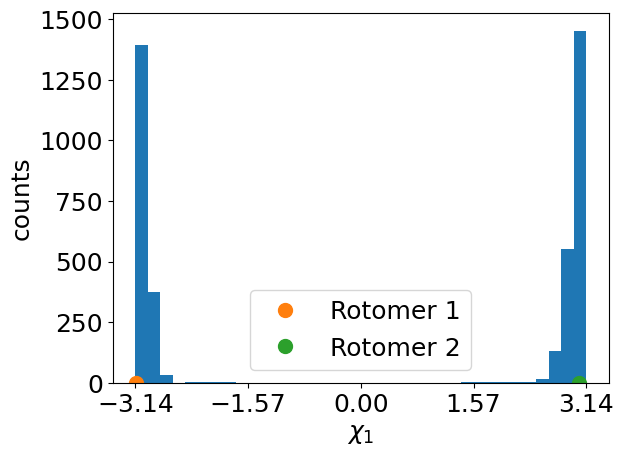

<Figure size 640x480 with 0 Axes>

In [68]:


#Here is the plot of Chi1 (Chi2 as well if it existed for this residue) pulling out specific frames
#3 where rotomer 1 and 4 where rotomer 2 exists
# Assuming dihedral_dict is defined
def plot_chi(res, frames_to_highlight=None):
    if res in dihedral_dict['chi1']:
        plt.hist(dihedral_dict['chi1'][res], bins=36, range=[-3.14, 3.14])
        plt.xticks([-3.14, -3.14/2, 0, 3.14/2, 3.14], fontsize=35)
        plt.xlabel('$\chi_1$', size=18)
        plt.ylabel('counts', size=18)
        plt.tick_params(labelsize=18)
        # Add points for frames_to_highlight
        if frames_to_highlight:
            for idx, frame_num in enumerate(frames_to_highlight, start=1):
                chi1_value = dihedral_dict['chi1'][res][frame_num - 1]  # Adjust frame number to index
                label = f'Rotomer {idx}'
                plt.plot(chi1_value, 0, 'o', markersize=10, label=label)  # Points indicating frame 3 and frame 5
        plt.legend(fontsize=18)
        plt.show()
        plt.clf()
    return
# Plot the chi1 histogram for residue 481 and include points for frames 3 and 5
plot_chi(295, frames_to_highlight=[1, 12])

In [71]:
# Define the residue number of interest
residue_number = 446
# Extract chi1 values for residue 446
chi1_values = dihedral_dict['chi1'].get(residue_number, None)
if chi1_values is not None:
    # Find frames where chi1 is greater than 0
    frames_with_positive_chi1 = np.where(chi1_values > 1.57)
    frames_with_negative_chi1 = np.where(chi1_values < -1.57)
    # Print or use the indices
    print("Frames where chi1 of residue", residue_number, "is greater than 0:", frames_with_positive_chi1)
    print("Frames where chi1 of residue", residue_number, "is less than 0:", frames_with_negative_chi1)

Frames where chi1 of residue 446 is greater than 0: (array([ 564,  701, 1176, 1365, 1484, 1619, 1668, 2897, 2972, 3105, 3170,
       3461, 3935], dtype=int64),)
Frames where chi1 of residue 446 is less than 0: (array([ 529,  831, 1526, 1685, 1952, 1969, 1970, 2547, 2922, 2941, 3499,
       3662], dtype=int64),)


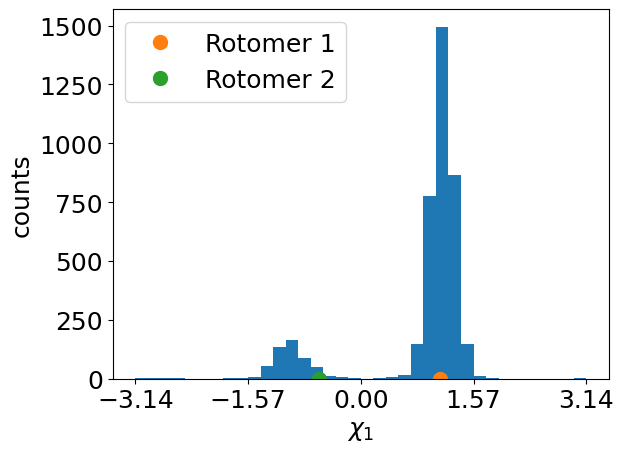

<Figure size 640x480 with 0 Axes>

In [73]:
#Here is the plot of Chi1 (Chi2 as well if it existed for this residue) pulling out specific frames
#3 where rotomer 1 and 4 where rotomer 2 exists
# Assuming dihedral_dict is defined
def plot_chi(res, frames_to_highlight=None):
    if res in dihedral_dict['chi1']:
        plt.hist(dihedral_dict['chi1'][res], bins=36, range=[-3.14, 3.14])
        plt.xticks([-3.14, -3.14/2, 0, 3.14/2, 3.14], fontsize=35)
        plt.xlabel('$\chi_1$', size=18)
        plt.ylabel('counts', size=18)
        plt.tick_params(labelsize=18)
        # Add points for frames_to_highlight
        if frames_to_highlight:
            for idx, frame_num in enumerate(frames_to_highlight, start=1):
                chi1_value = dihedral_dict['chi1'][res][frame_num - 1]  # Adjust frame number to index
                label = f'Rotomer {idx}'
                plt.plot(chi1_value, 0, 'o', markersize=10, label=label)  # Points indicating frame 3 and frame 5
        plt.legend(fontsize=18)
        plt.show()
        plt.clf()
    return
# Plot the chi1 histogram for residue 481 and include points for frames 3 and 5
plot_chi(446, frames_to_highlight=[564, 3499])

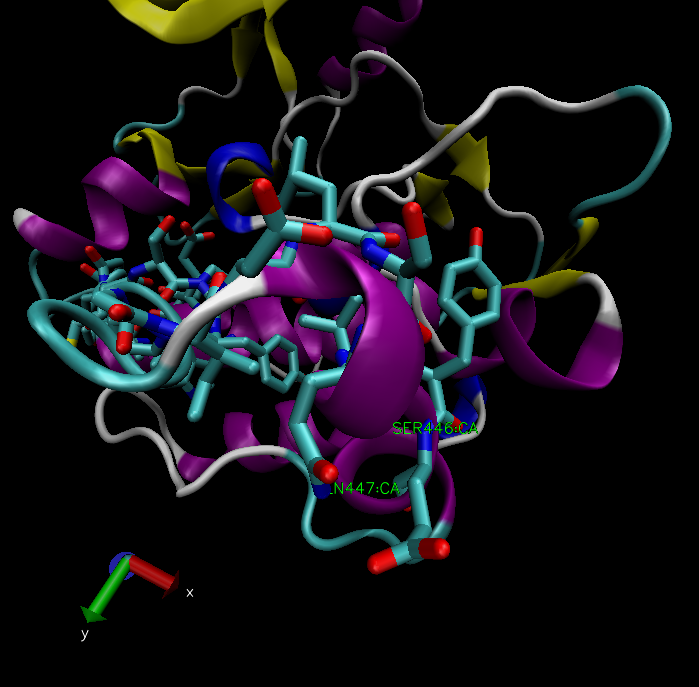

can change the residue number in the code below to view the ramachandran plot as seen below

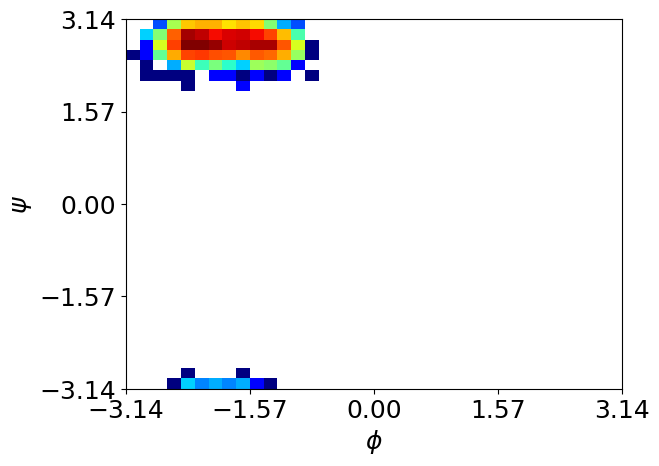

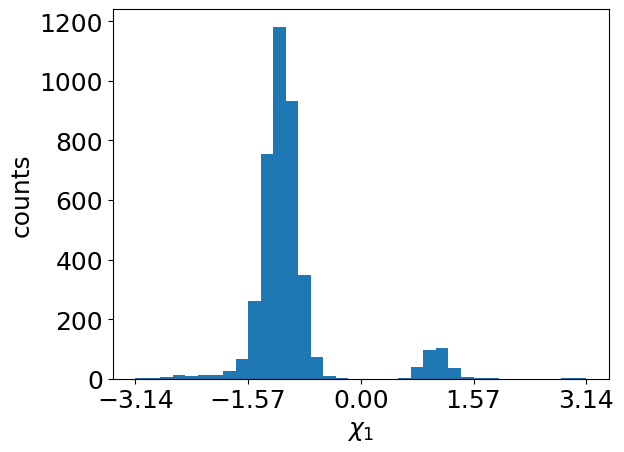

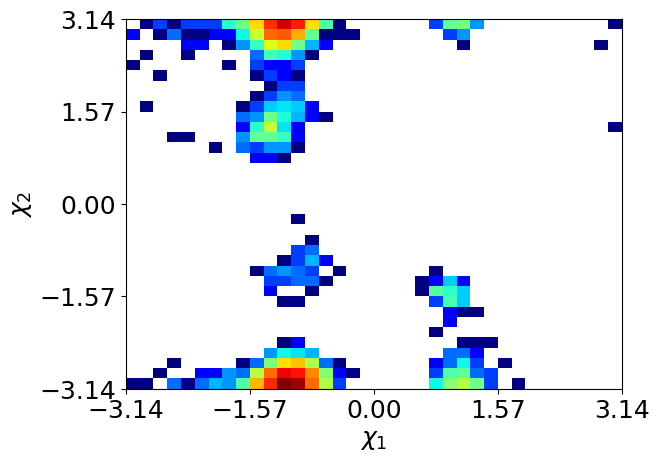

In [29]:
plot_phipsi(308)
plt.clf()
plot_chi(308)

In [30]:
#Lets Visualize Some Rotamers
#Lets Find all the VAL residues and plot thier X1 values
CA_sel=top.select('name CA')
resnames=[]
resnums=[]
for i in CA_sel:
 resnum=top.atom(i).residue.resSeq
 resnums.append(resnum)
 resname=top.atom(i).residue.name
 resnames.append(resname)

resnums=np.asarray(resnums)
resnames=np.asarray(resnames)
VAL_indices=np.where(resnames=='VAL')
Val_resnums=resnums[VAL_indices]
Val_resnums

array([256, 260, 268, 270, 280, 289, 299, 304, 335, 338, 339, 371, 377,
       379, 422, 427, 448, 468])

Residue 256


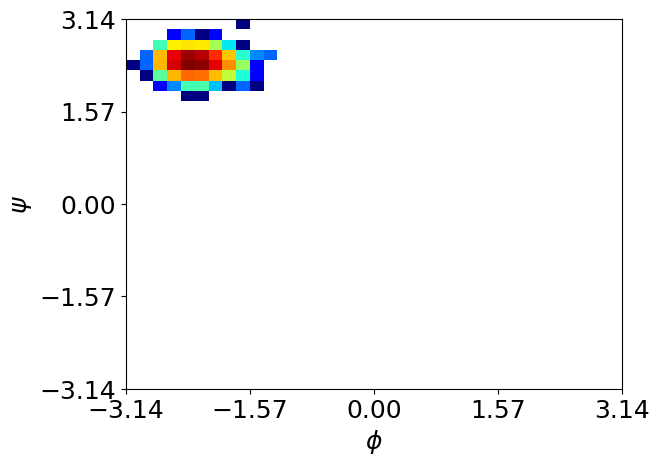

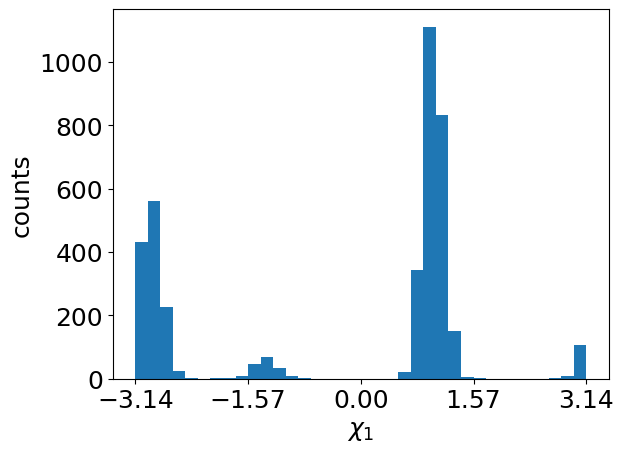

Residue 260


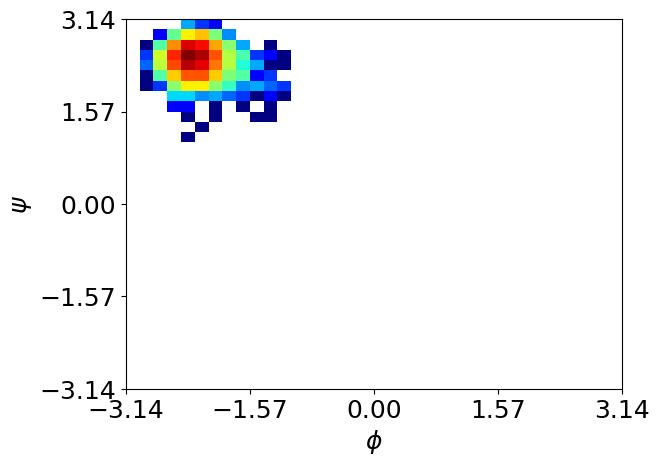

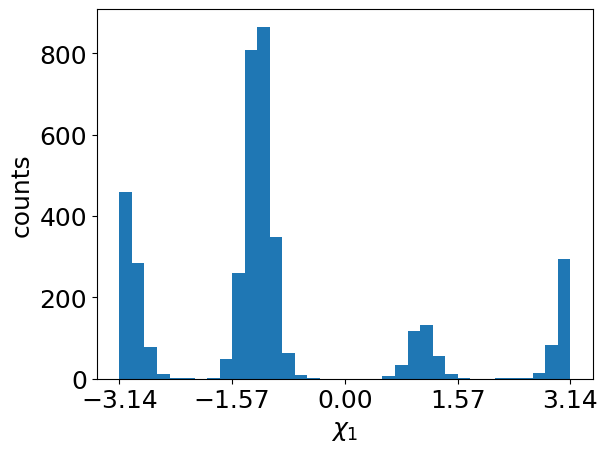

Residue 268


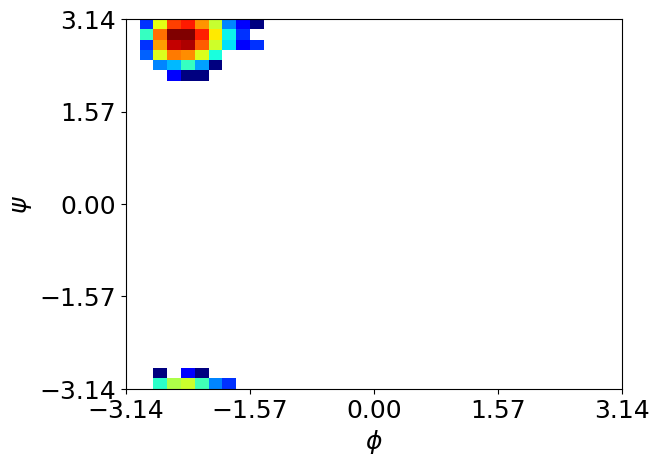

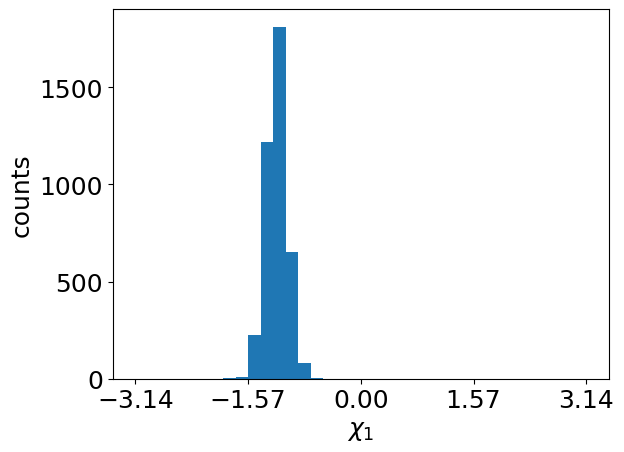

Residue 270


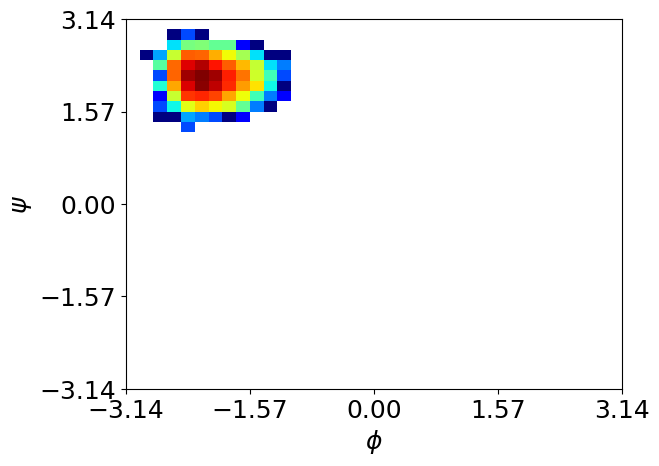

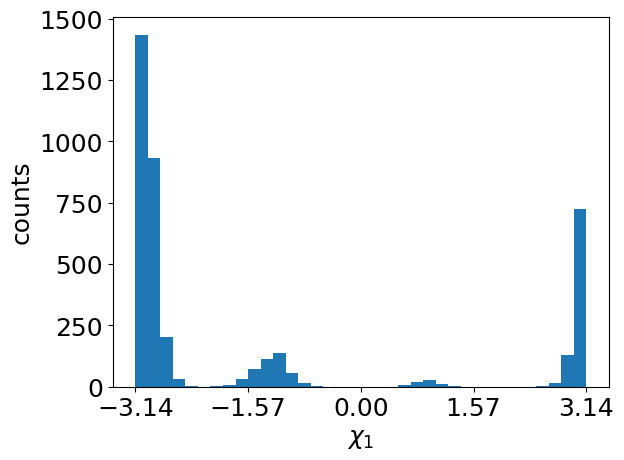

Residue 280


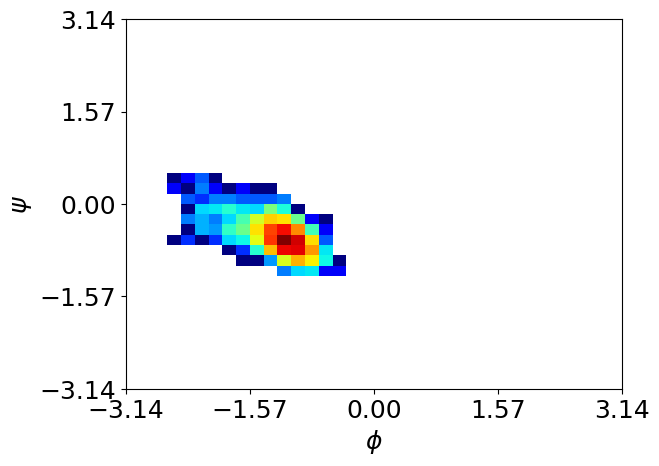

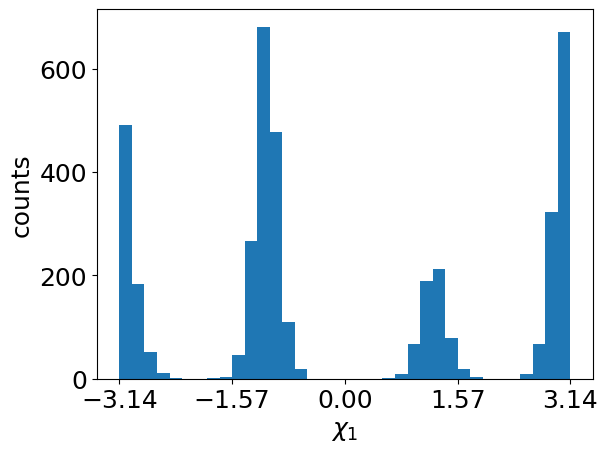

Residue 289


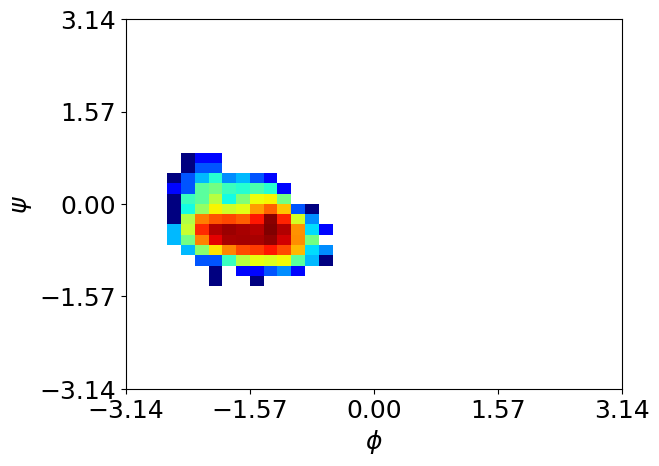

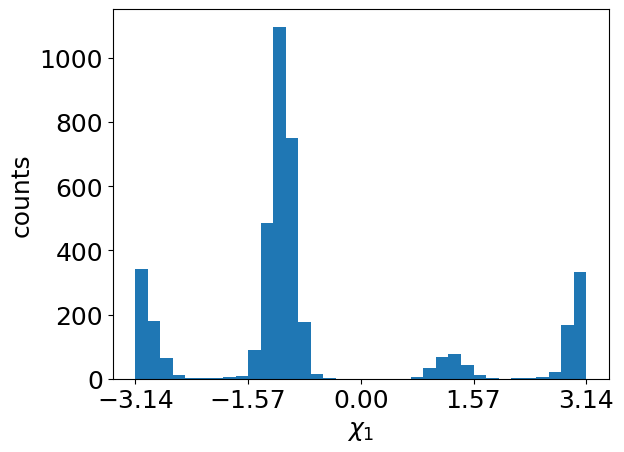

Residue 299


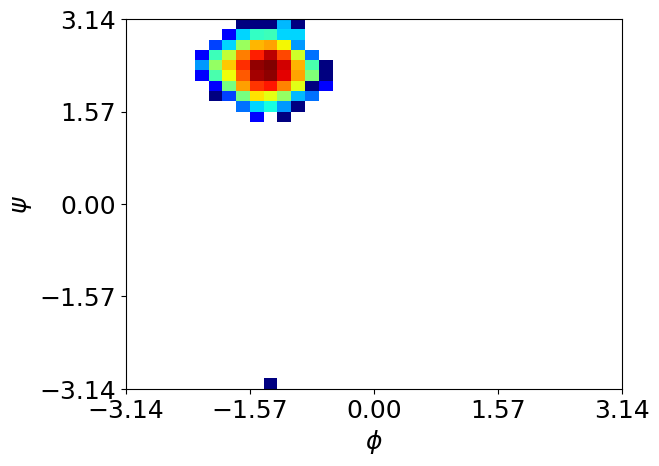

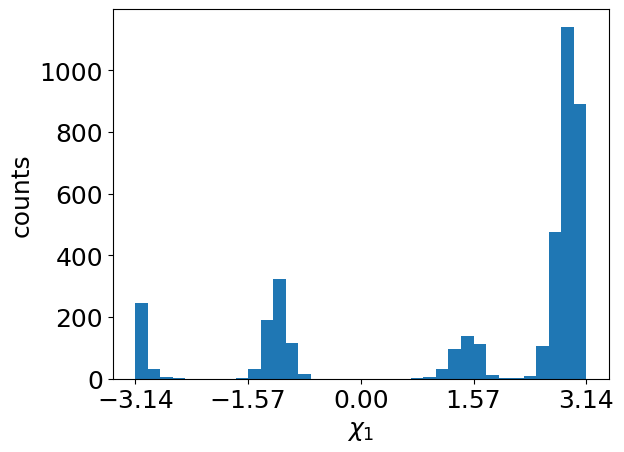

Residue 304


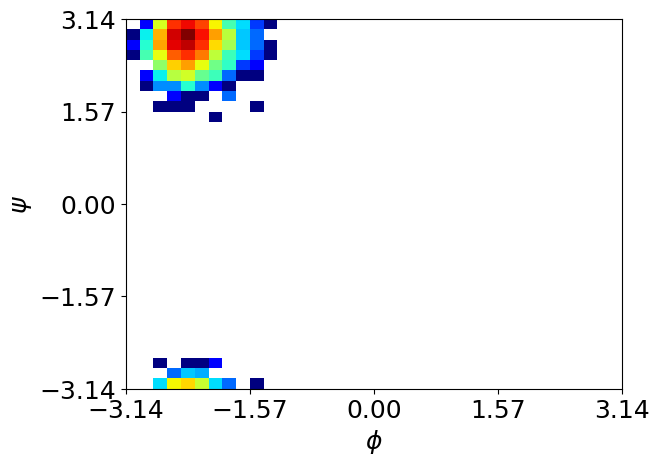

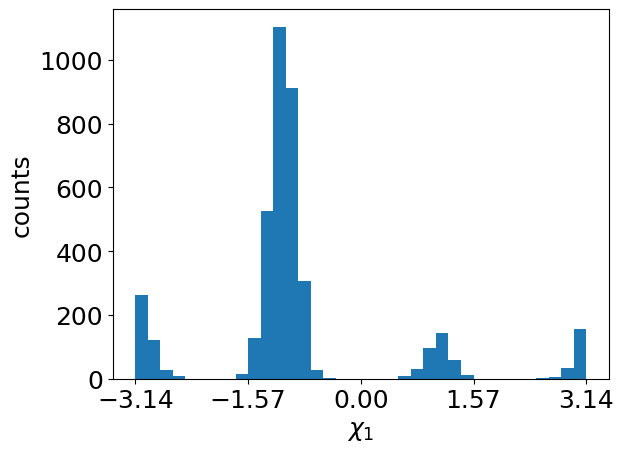

Residue 335


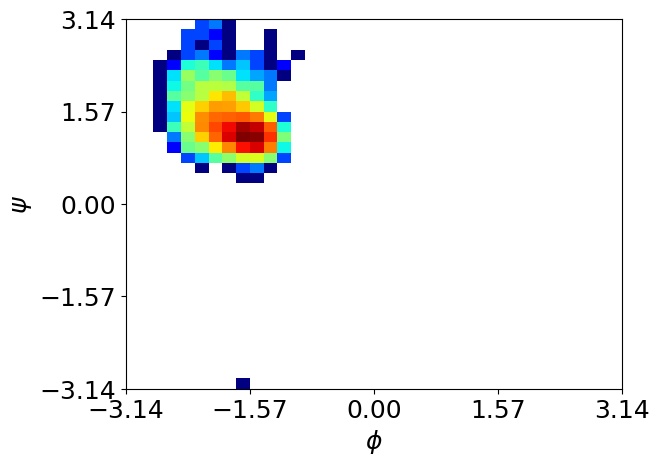

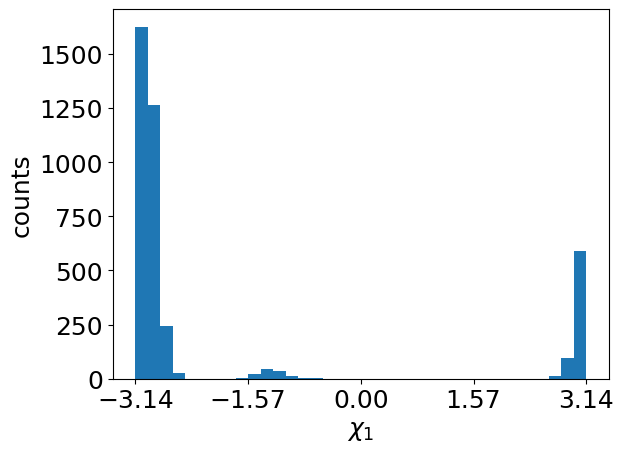

Residue 338


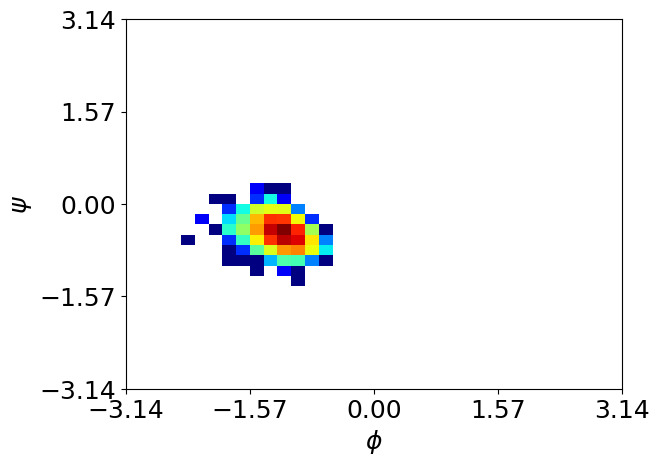

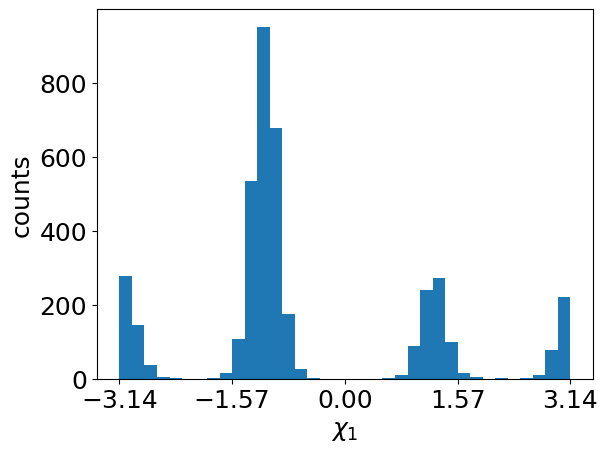

Residue 339


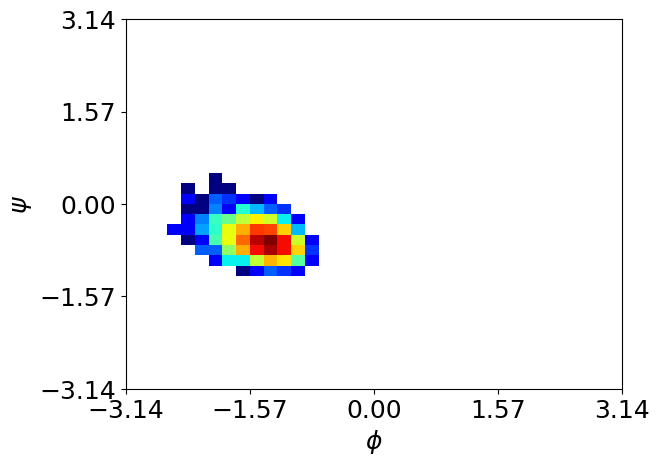

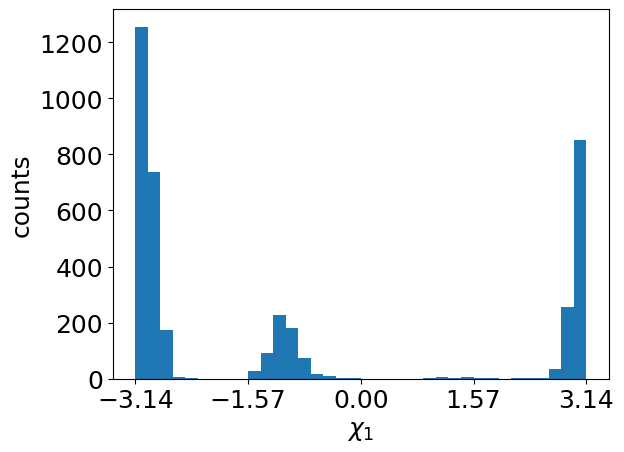

Residue 371


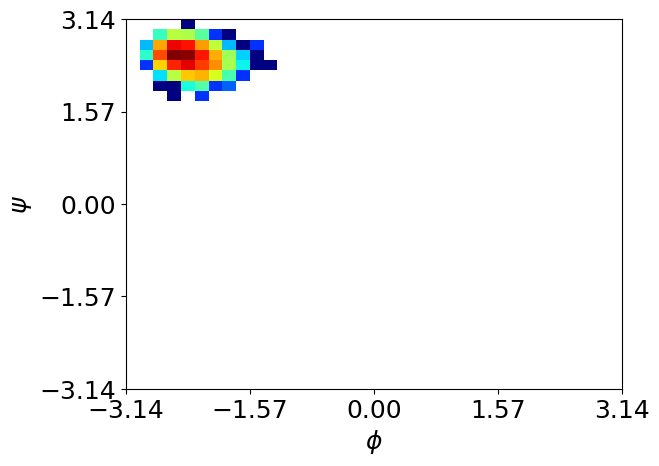

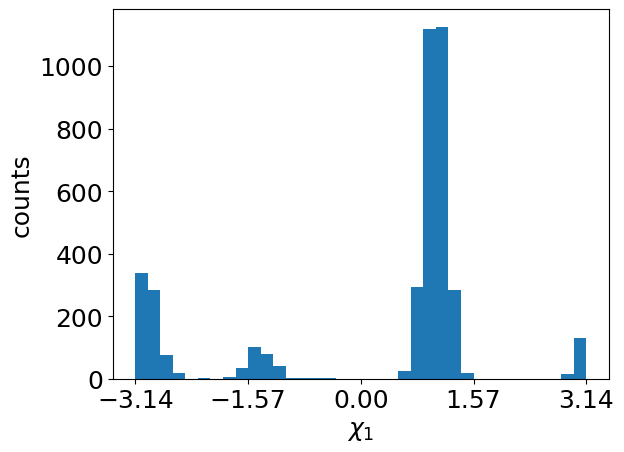

Residue 377


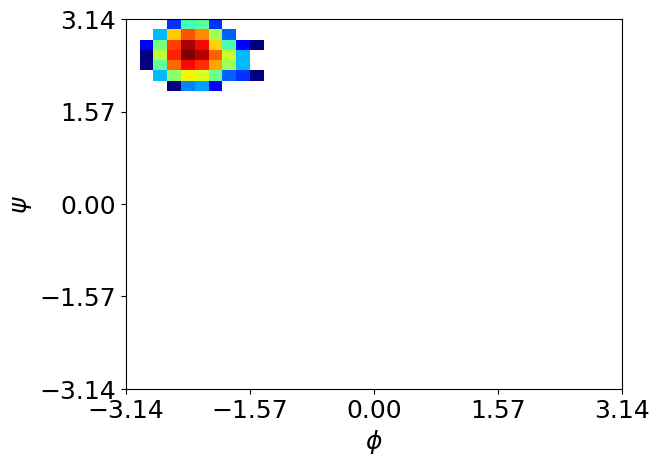

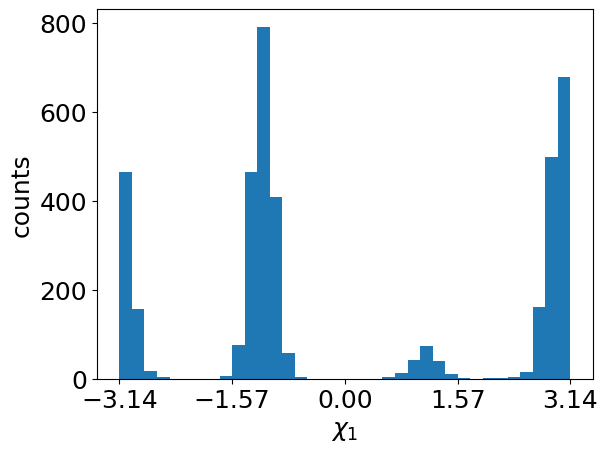

Residue 379


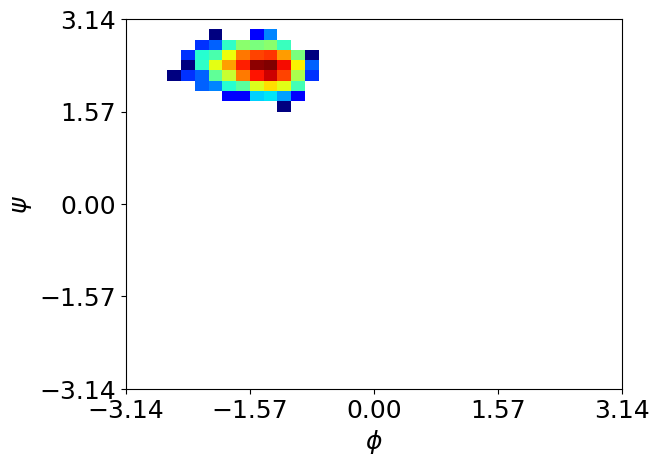

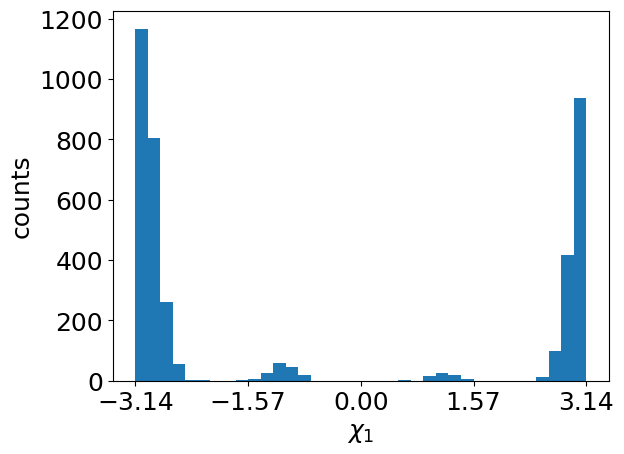

Residue 422


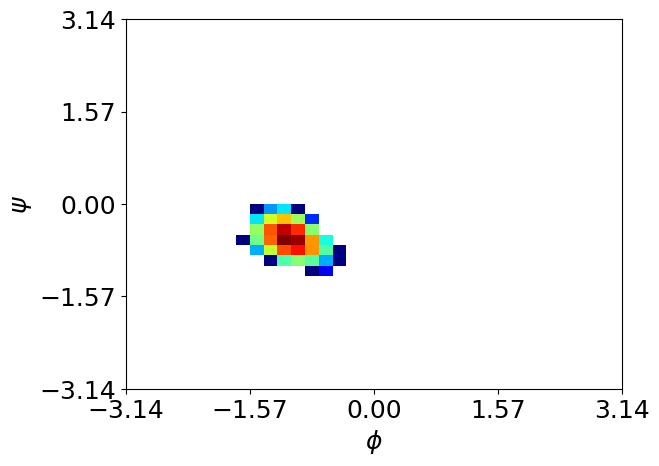

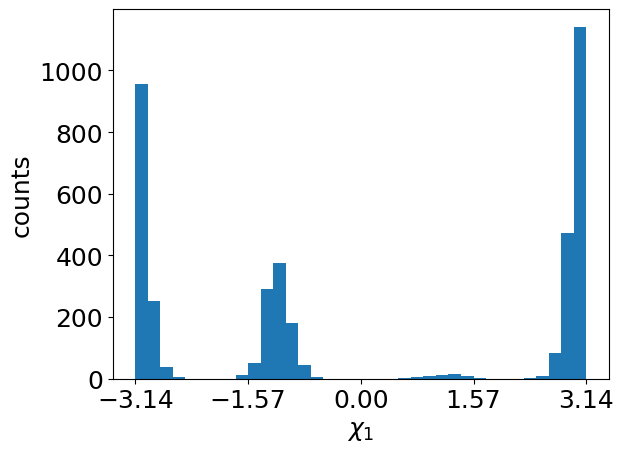

Residue 427


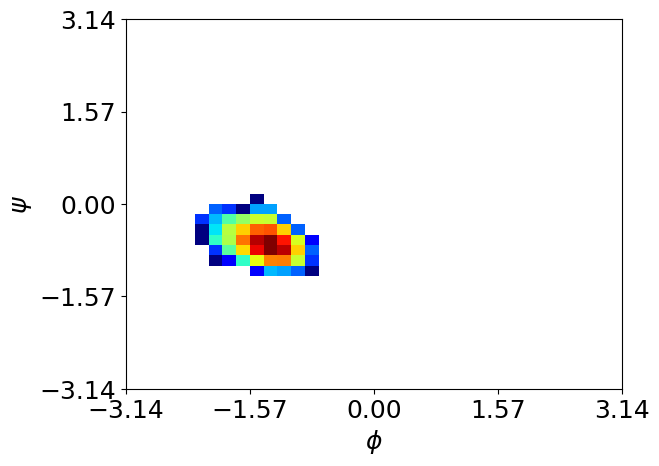

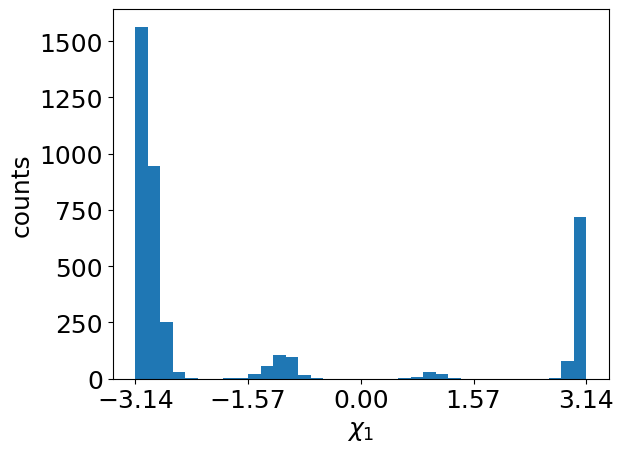

Residue 448


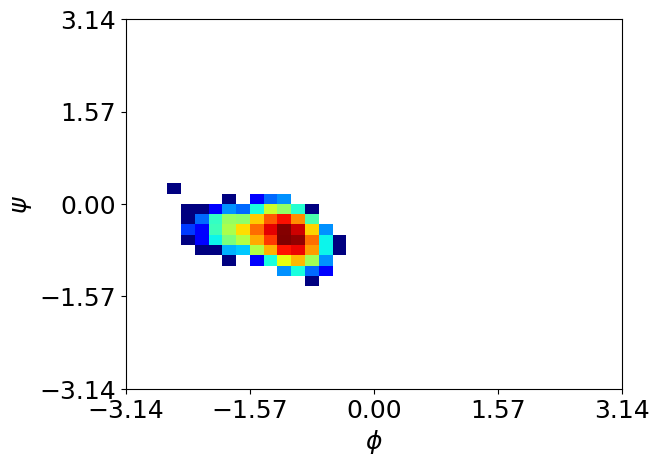

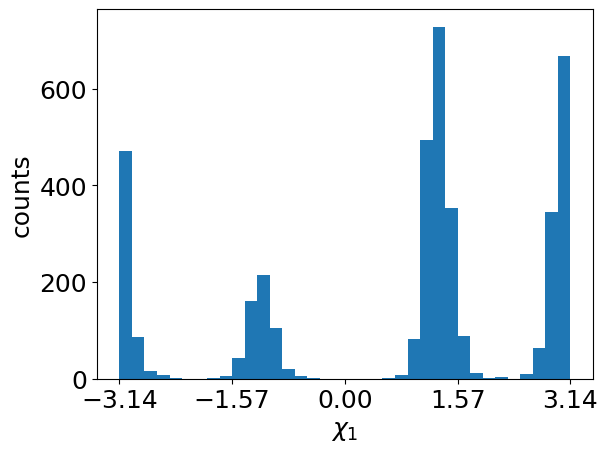

Residue 468


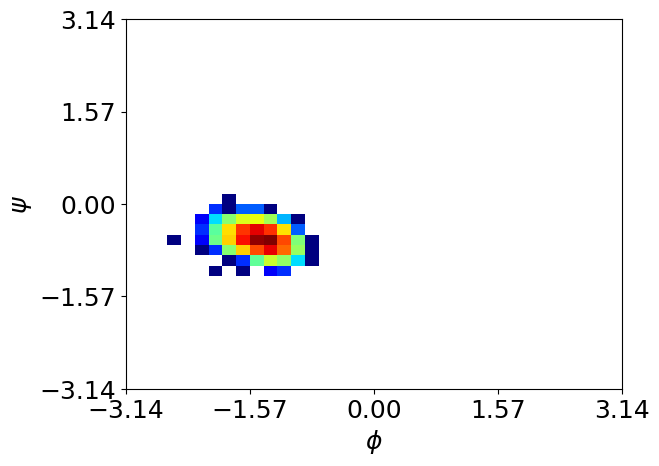

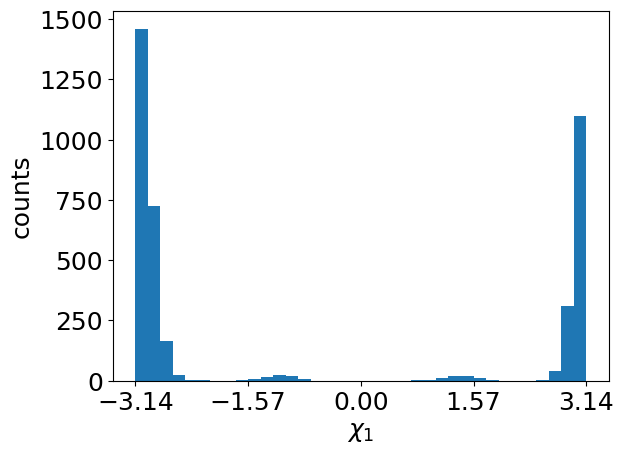

<Figure size 640x480 with 0 Axes>

In [32]:
for i in Val_resnums:
    print("Residue",i)
    plot_phipsi(i)
    plt.clf()
    plot_chi(i)
    plt.clf()

***HOMEWORK Problem 3***

**Identify a residue that has 2 rotameric states and make representative snapshots to illustrate the 2 conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the Chi 1 histogram (or Chi1/Chi2 if the residue has a Chi2 degree of freedom) and add a marking to the plot to indicate the dihedrals shown in your snapshot**



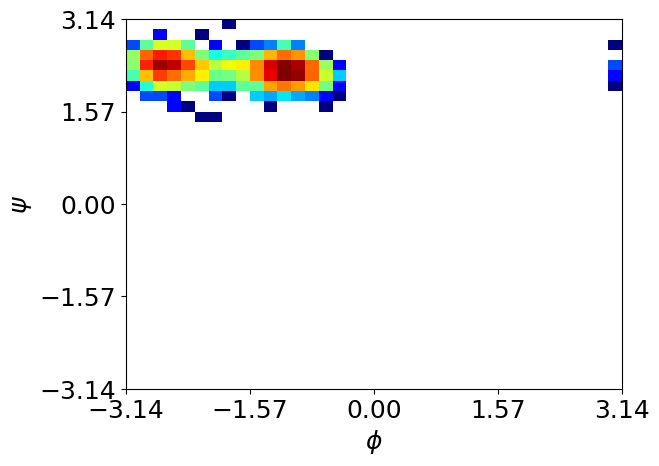

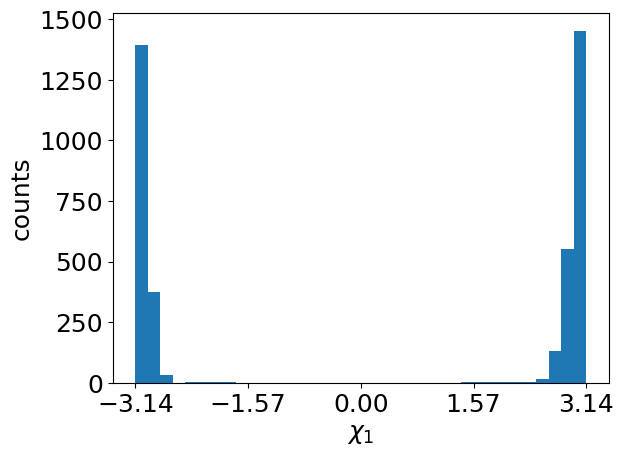

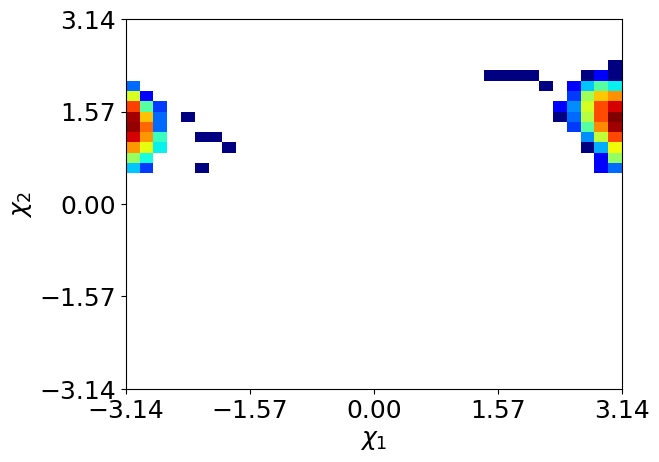

In [33]:
#to visualize the plot for HIS295
plot_phipsi(295)
plt.clf()
plot_chi(295)

In [34]:
#Heres a function to plot a phi/psi ramachandran plot:

def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
     plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()   
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return




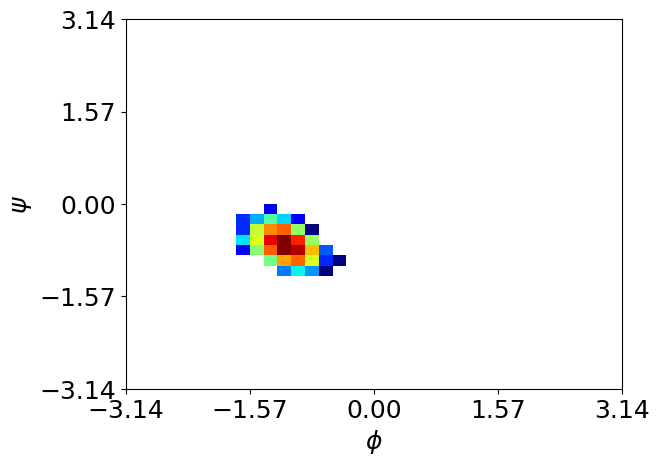

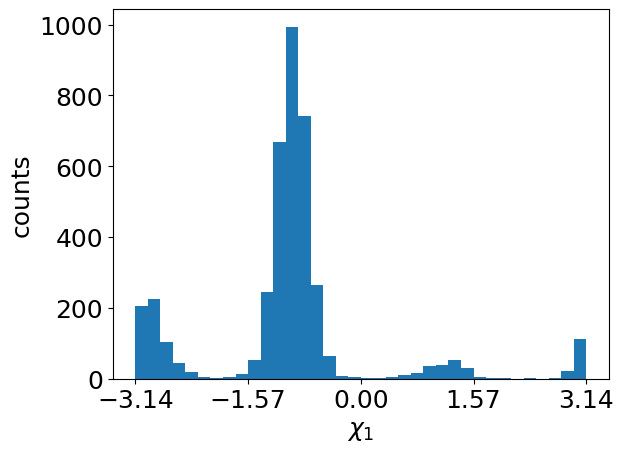

<Figure size 640x480 with 0 Axes>

In [35]:
#to visualize the plot for SER348
plot_phipsi(349)
plt.clf()
plot_chi(349)

***HOMEWORK Problem 4***

**Identify a residue that has 2 phi/psi free energy minima states and make representative snapshots to illustrate representative conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the phi/psi histograms and add marking to the plot to indicate the phi/psi angles shown in your snapshot**


Identifying residues with two phi/psi free energy minima states typically involves analyzing the distribution of backbone torsion angles (phi and psi) in protein structures. Residues with multiple minima in their phi/psi angles often exhibit conformational flexibility and may play important roles in protein dynamics and function.

Here are a few examples of residues commonly known to have two phi/psi free energy minima states:

1. Glycine (Gly): Glycine lacks a side chain, which allows for increased flexibility in its backbone torsion angles. It often exhibits multiple phi/psi conformations due to its ability to adopt both alpha-helical and beta-sheet conformations.

2. Proline (Pro): Proline's unique cyclic side chain restricts the conformational freedom of its backbone, leading to distinct phi/psi angle distributions compared to other amino acids. Proline can adopt both cis and trans configurations, resulting in two distinct phi/psi minima states.

3. Pre-proline residues: Residues preceding a proline (pre-proline residues) often exhibit distinct phi/psi angle distributions due to the influence of proline's conformational preferences. These residues can adopt multiple conformations to accommodate the geometric constraints imposed by proline's cyclic side chain.

4. Beta-branched amino acids: Amino acids with beta-branched side chains, such as valine (Val), isoleucine (Ile), and threonine (Thr), may also exhibit two phi/psi minima states due to steric hindrance and interactions with neighboring residues.

Identifying residues with two phi/psi free energy minima states typically involves analyzing protein structures using computational tools such as molecular dynamics simulations or energy minimization algorithms. These residues are often found in regions of proteins that undergo conformational changes or participate in protein-protein or protein-ligand interactions.

In [43]:
sequence

' [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER349, ALA350, MET351, GLU352, TYR353, LEU354, GLU355, LYS356, LYS357, ASN358, PHE359, ILE360, HIS361, ARG362, ASP363, LEU364, ALA365, ALA36

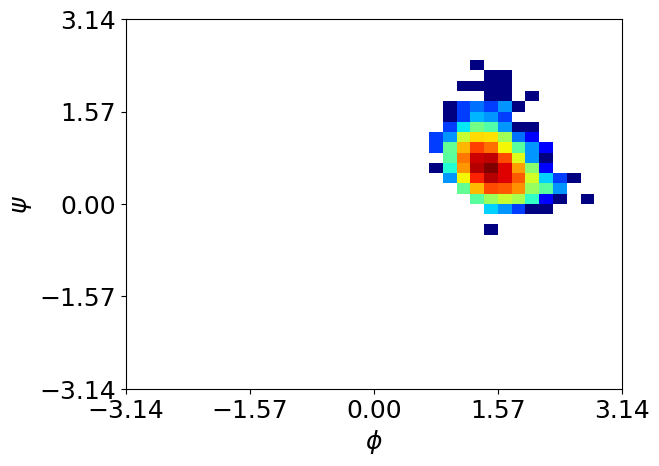

<Figure size 640x480 with 0 Axes>

In [64]:
#to visualize the plot for THR389
plot_phipsi(436)
plt.clf()
plot_chi(436)

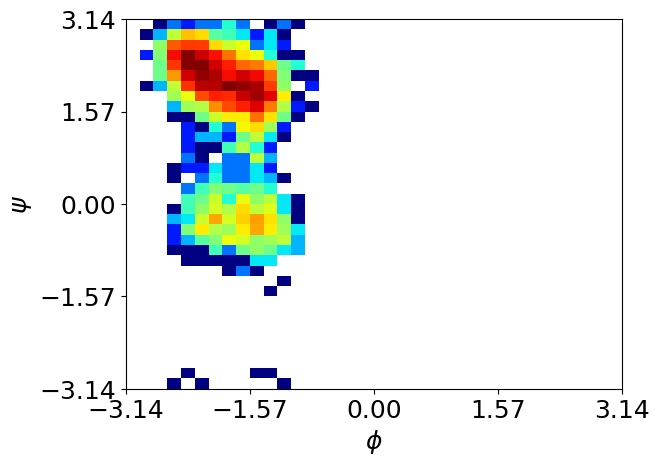

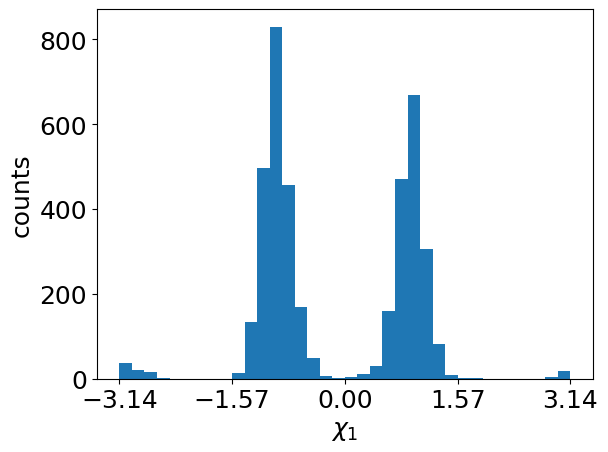

<Figure size 640x480 with 0 Axes>

In [48]:
#to visualize the plot for THR389
plot_phipsi(389)
plt.clf()
plot_chi(389)

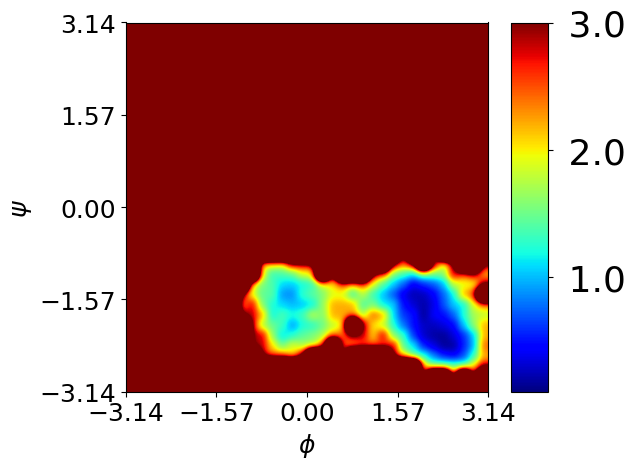

In [47]:
#Challenge Problem 2***

#Identify a residue with phi/psi basins that favor distinct rotamers and make a plot of chi distributions for different regions of the phi/psi basins**
#Lets Make A Pretty Free Energy Plot 

def plot_phipsi_FES(res):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()                                                                                                 
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return

plot_phipsi_FES(389)

In [ ]:
#Challenge Problem 2***

#Identify a residue with phi/psi basins that favor distinct rotamers and make a plot of chi distributions for different regions of the phi/psi basins**
#Lets Make A Pretty Free Energy Plot 

def plot_phipsi_FES(res):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()                                                                                                 
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return

plot_phipsi_FES(435)

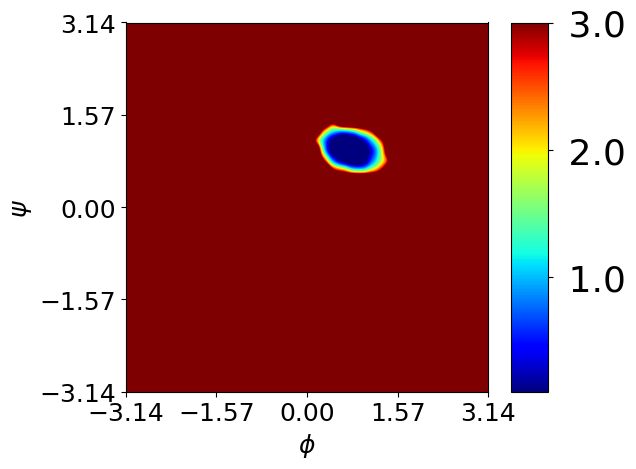

In [38]:
#Challenge Problem 2***

#Identify a residue with phi/psi basins that favor distinct rotamers and make a plot of chi distributions for different regions of the phi/psi basins**
#Lets Make A Pretty Free Energy Plot 

def plot_phipsi_FES(res):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()                                                                                                 
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return

plot_phipsi_FES(435)

Identifying a residue with phi/psi basins that favor distinct rotamers involves analyzing the backbone torsion angles (phi and psi) and the side chain torsion angles (chi) in a protein structure. Let's choose the amino acid tyrosine (Tyr) as an example, as it often exhibits distinct rotameric states depending on its backbone conformation.

Here's a step-by-step guide to identify a tyrosine residue with distinct rotamers and make a plot of chi distributions for different regions of the phi/psi basins:

1. **Load the Protein Structure**: Open VMD and load the protein structure file (.pdb, .psf, etc.) containing the protein of interest.

2. **Identify Tyrosine Residues**: Use the Tcl Console in VMD to select all tyrosine residues in the protein structure. You can use the following Tcl command:
   ```tcl
   set tyr_residues [atomselect top "resname TYR"]
   ```

3. **Calculate Phi/Psi Angles**: Calculate the phi and psi angles for each tyrosine residue. You can use the `measure dihedrals` command in VMD:
   ```tcl
   set phi_psi [measure dihedrals $tyr_residues]
   ```

4. **Identify Phi/Psi Basins**: Analyze the phi and psi angles to identify distinct basins or regions in the Ramachandran plot that correspond to different backbone conformations.

5. **Calculate Chi Angles**: For tyrosine residues in each phi/psi basin, calculate the chi angle distribution for different rotameric states of the tyrosine side chain. The chi angle for tyrosine corresponds to the rotation around the Cβ-Cγ bond.

6. **Plot Chi Distributions**: Plot histograms of the chi angles for tyrosine residues in each identified phi/psi basin. You can use plotting libraries in VMD or export the data to another plotting software for visualization.

7. **Analyze Results**: Analyze the chi distributions to identify distinct rotameric states of tyrosine residues corresponding to different regions of the phi/psi basins.

By following these steps, you can identify a tyrosine residue with phi/psi basins that favor distinct rotamers and visualize the distribution of chi angles corresponding to different backbone conformations. This analysis provides insights into the conformational flexibility of tyrosine residues in protein structures.

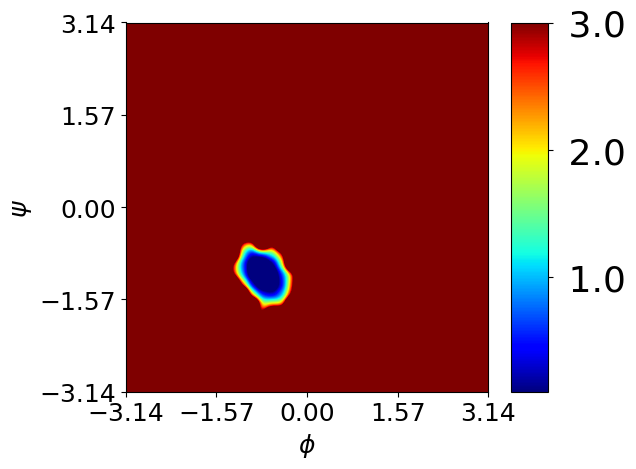

In [37]:
#Lets Make A Pretty Free Energy Plot 

def plot_phipsi_FES(res):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()                                                                                                 
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return

plot_phipsi_FES(350)